## Технологический процесс горнодобывающей промышленности
Технологический процесс
1. Rougher feed — исходное сырье
2. Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
3. Xanthate **— ксантогенат (промотер, или активатор флотации);
4. Sulphate — сульфат (на данном производстве сульфид натрия);
5. Depressant — депрессант (силикат натрия).
6. Rougher process (англ. «грубый процесс») — флотация
7. Rougher tails — отвальные хвосты
8. Float banks — флотационная установка
9. Cleaner process — очистка
10. Rougher Au — черновой концентрат золота
11. Final Au — финальный концентрат золота

Параметры этапов

1. air amount — объём воздуха
2. fluid levels — уровень жидкости
3. feed size — размер гранул сырья
4. feed rate — скорость подачи


## Загрузка данных

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

import math 
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score 
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor  

### Загрузка данных gold_recovery_train_new

In [2]:
df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train.info()
display(df_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
list_0=['rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol','final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol']
df_train = df_train.dropna(subset=list_0)
df_train = df_train.dropna()
print('Доля пропусков в столбце ,%:')
rezul=df_train.isna().mean() * 100
print(rezul)
print('Дубликатов = ',df_train.duplicated().sum()) 
for i in list_0:
    df_train=df_train[df_train[i]!=0]


Доля пропусков в столбце ,%:
date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64
Дубликатов =  0


In [4]:
display(df_train[df_train['rougher.output.concentrate_au']==0])

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Загрузка данных gold_recovery_test_new

In [5]:
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test.info()
display(df_test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [6]:
print('Доля пропусков в столбце ,%:') 
rezul=df_test.isna().mean() * 100
print(rezul)
print('Дубликатов = ',df_test.duplicated().sum()) 
df_test = df_test.fillna(0)

Доля пропусков в столбце ,%:
date                                          0.000000
primary_cleaner.input.sulfate                 0.075614
primary_cleaner.input.depressant              0.094518
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.075614
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.056711
rougher.input.feed_size                       0.018904
rougher.input.feed_sol              

### Загрузка данных gold_recovery_full_new.

In [7]:
df_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full.info()
display(df_full.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [8]:
print('Доля пропусков в столбце ,%:')
rezul=df_full.isna().mean() * 100
print(rezul)
print('Дубликатов = ',df_full.duplicated().sum())
df_full = df_full.fillna(0)

Доля пропусков в столбце ,%:
date                                          0.000000
final.output.concentrate_ag                   0.005144
final.output.concentrate_pb                   0.005144
final.output.concentrate_sol                  1.085447
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005144
secondary_cleaner.state.floatbank5_b_air      0.005144
secondary_cleaner.state.floatbank5_b_level    0.005144
secondary_cleaner.state.floatbank6_a_air      0.010289
secondary_cleaner.state.floatbank6_a_level    0.005144
Length: 87, dtype: float64
Дубликатов =  0


## Анализ данных

### Анализ правильности данных "rougher.output.recovery"

In [9]:
def recovery (C,F,T):
    rec=((C*(F-T))/(F*(C-T)))*100
    return rec

C=df_train['rougher.output.concentrate_au']
F=df_train['rougher.input.feed_au'] 
T=df_train['rougher.output.tail_au']

df_train['rougher.output.recovery.find']=recovery(C,F,T)
MAE=mean_absolute_error(df_train['rougher.output.recovery'],df_train['rougher.output.recovery.find']) 
print(f'Cреднее абсолютное отклонение (МАЕ) параметра rougher.output.recovery = {MAE:.3}')

Cреднее абсолютное отклонение (МАЕ) параметра rougher.output.recovery = 1e-14


**Вывод**
Среднее абсолютное отклонение является очень маленьким из чего можно сделать вывод, что параметр "rougher.output.recovery" расчитан правильно

### Анализ данных недоступных в тестовой выборке.

In [10]:
columns_train=pd.Series(df_train.columns) 
columns_test=pd.Series(df_test.columns) 
not_columns_test=columns_train[~columns_train.isin(columns_test)] 
columns_train_test=columns_train[~columns_train.isin(not_columns_test)]
print('Наименование отсутствующих столбцов')
print(not_columns_test)
print(f' Всего отсутствующих столбцов {not_columns_test.count()}')

print('Наименование соответствующих столбцов ')
print(columns_train_test)

Наименование отсутствующих столбцов
1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
5                                 final.output.recovery
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        ro

**Вывод**

Отсутствующие данные относятся к следующим  разделать технологического процесса

1.  final.output - это итоговые характеристики выходного продукта
2.  primary_cleaner.output - характеристики продукта после первичной очистки
3.  rougher.output - характеристики продукта после флотации
4.  secondary_cleaner.output - характеристики продукта после вторичной очистки
5.  rougher.calculation - расчетная характеристика после флотации
6.  rougher.output.recovery - расчетная характеристика, эффективность процесса флотации
7.  final.output.recovery - расчетная характеристика, эффективност второй ступени очистки
8. Можно без потери удалить столбец с датами

In [11]:
df_train = df_train.drop(['date'], axis=1) 


### Анализ концентраций металлов на разных этапах

In [12]:
def tex_proc_info (data,colum,metal,etap):
    data.plot(y=colum,kind='hist' ,bins=20,grid=True, label=metal,figsize=(20, 6)) 
    print(etap)
    med_1=data[colum].mean() # среднее значение 
    print(f'Среднее содержание {metal} в материале =  {med_1:.4}' )
    med_2=data[colum].median()  #  медианное значение
    print(f'Медианное содержание {metal} в материале =  {med_2:.4}')
    return med_1,med_2

#### Au флотация

In [13]:
display(df_train[df_train['primary_cleaner.output.concentrate_au']==0])

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.find


После флотации
Среднее содержание Au в материале =  20.15
Медианное содержание Au в материале =  20.31


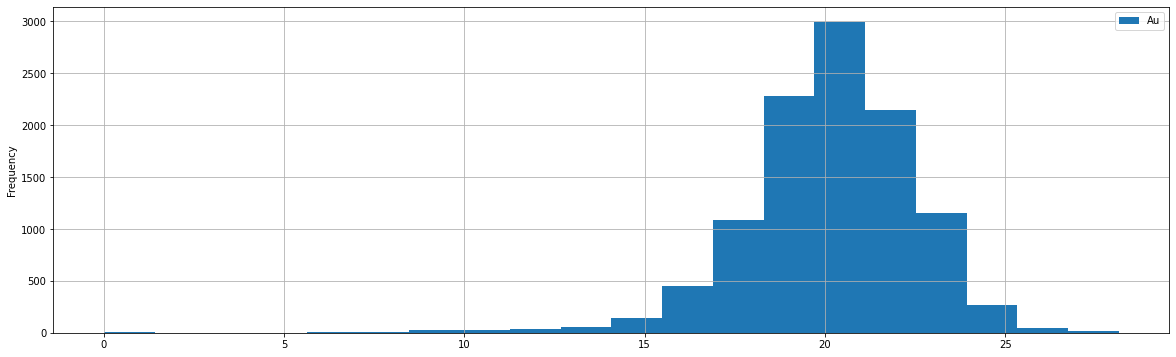

In [14]:
rougher_Au_men,rougher_Au_med=tex_proc_info (df_train,'rougher.output.concentrate_au','Au','После флотации')

#### Au первая ступень очистки

После первой ступени очистки
Среднее содержание Au в материале =  32.51
Медианное содержание Au в материале =  33.0


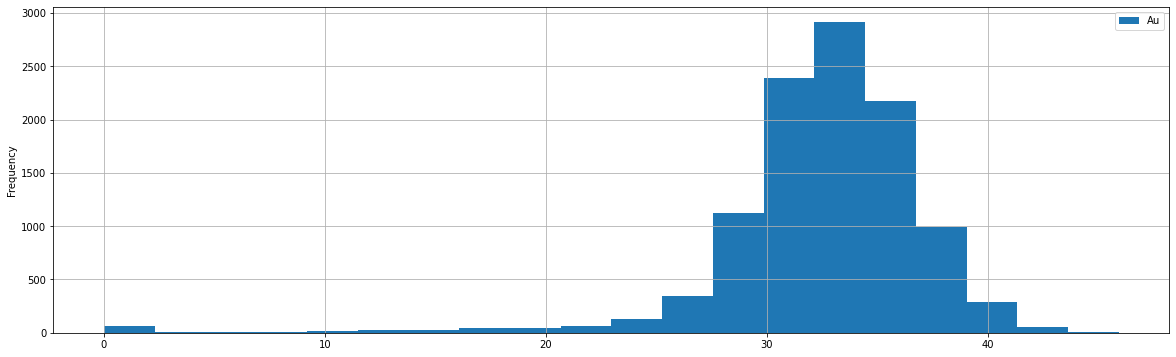

In [15]:
primary_Au_men,primary_Au_med=tex_proc_info (df_train,'primary_cleaner.output.concentrate_au','Au','После первой ступени очистки')

#### Au вторая ступень очистки

После второй ступени очистки
Среднее содержание Au в материале =  44.25
Медианное содержание Au в материале =  44.8


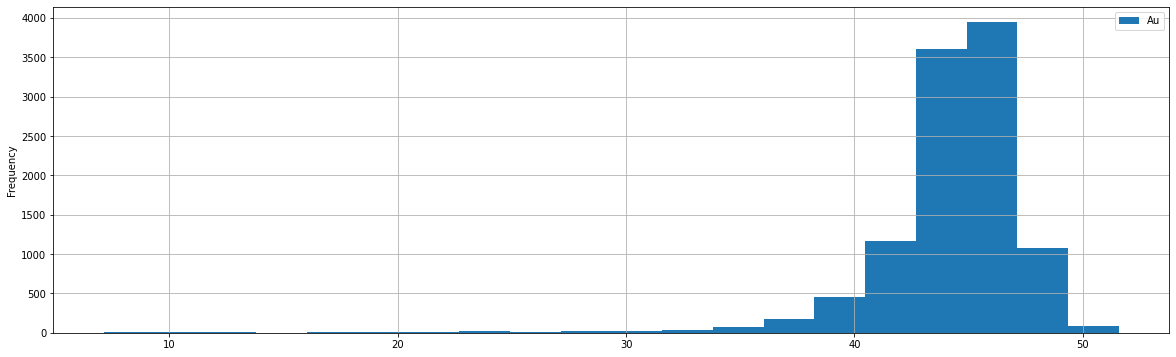

In [16]:
final_Au_men, final_Au_med=tex_proc_info (df_train,'final.output.concentrate_au','Au','После второй ступени очистки')

#### Ag флотация

После флотации
Среднее содержание Ag в материале =  12.07
Медианное содержание Ag в материале =  11.86


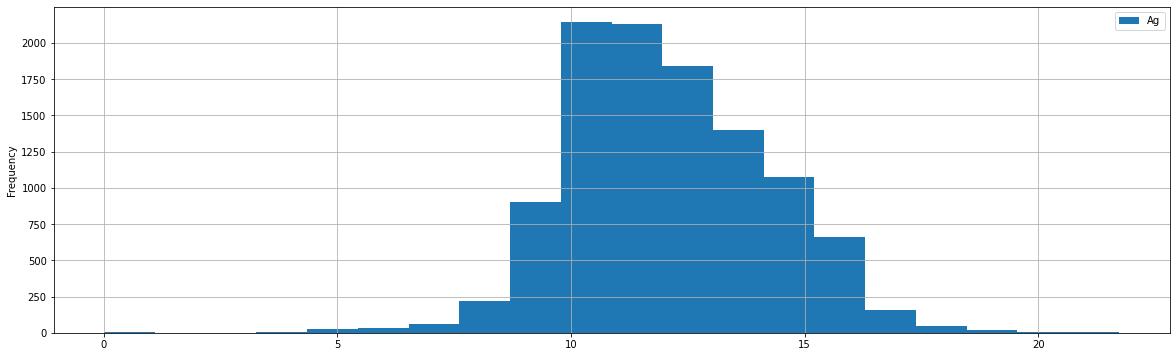

In [17]:
rougher_Ag_men,rougher_Ag_med=tex_proc_info (df_train,'rougher.output.concentrate_ag','Ag','После флотации')

#### Ag первая ступень очистки

После первой ступени очистки
Среднее содержание Ag в материале =  8.484
Медианное содержание Ag в материале =  8.463


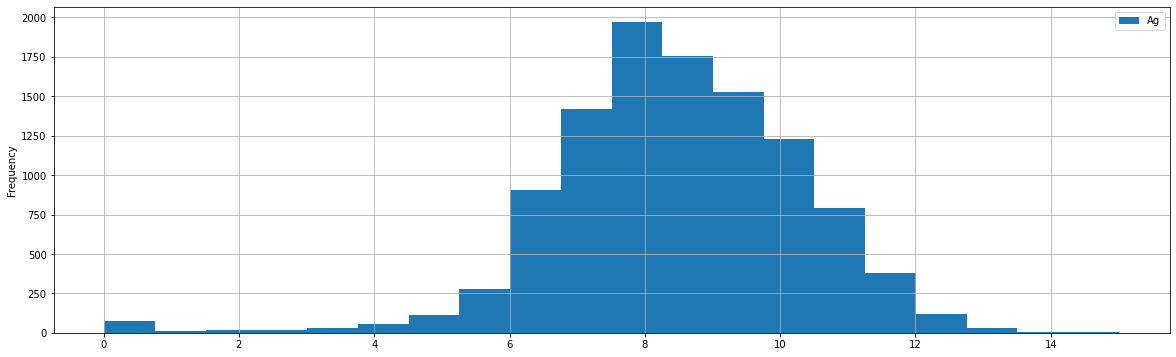

In [18]:
primary_Ag_men,primary_Ag_med=tex_proc_info (df_train,'primary_cleaner.output.concentrate_ag','Ag','После первой ступени очистки')

#### Ag вторая ступень очистки

После второй ступени очистки
Среднее содержание Ag в материале =  5.178
Медианное содержание Ag в материале =  5.015


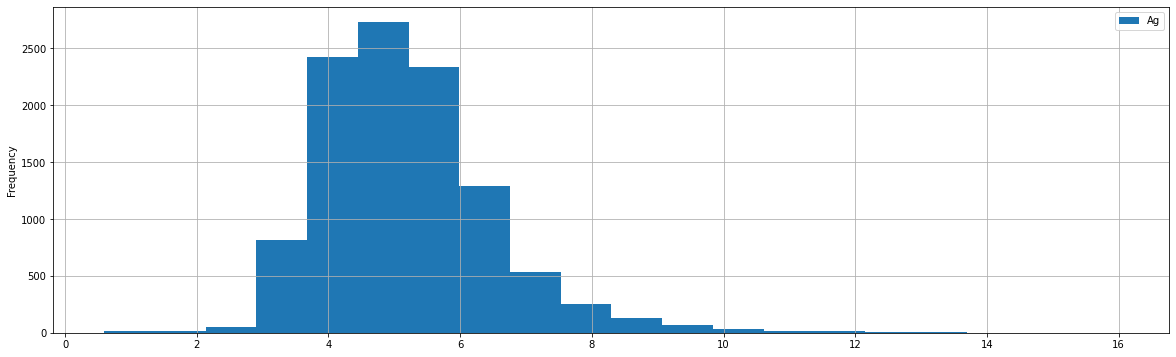

In [19]:
final_Ag_men,final_Ag_med=tex_proc_info (df_train,'final.output.concentrate_ag','Ag','После второй ступени очистки')

#### Pb флотация

После флотации
Среднее содержание Pb в материале =  7.756
Медианное содержание Pb в материале =  7.736


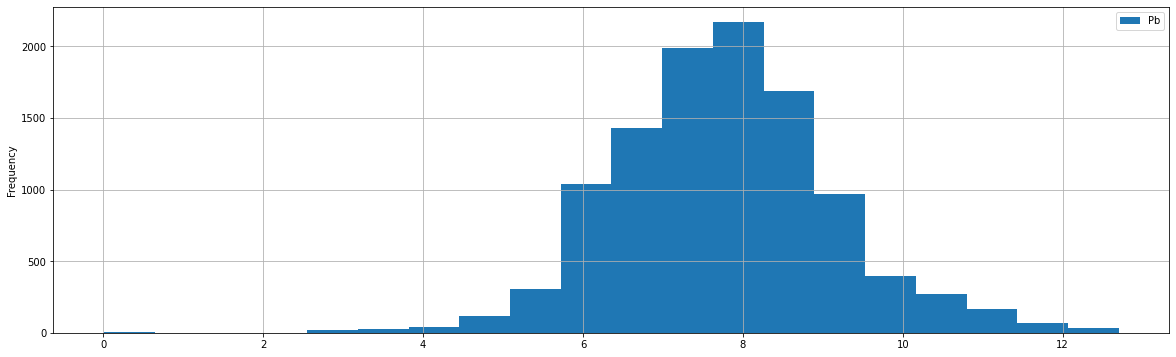

In [20]:
rougher_Pb_men,rougher_Pb_med=tex_proc_info (df_train,'rougher.output.concentrate_pb','Pb','После флотации')

#### Pb первая ступень очистки

После первой ступени очистки
Среднее содержание Pb в материале =  9.595
Медианное содержание Pb в материале =  9.902


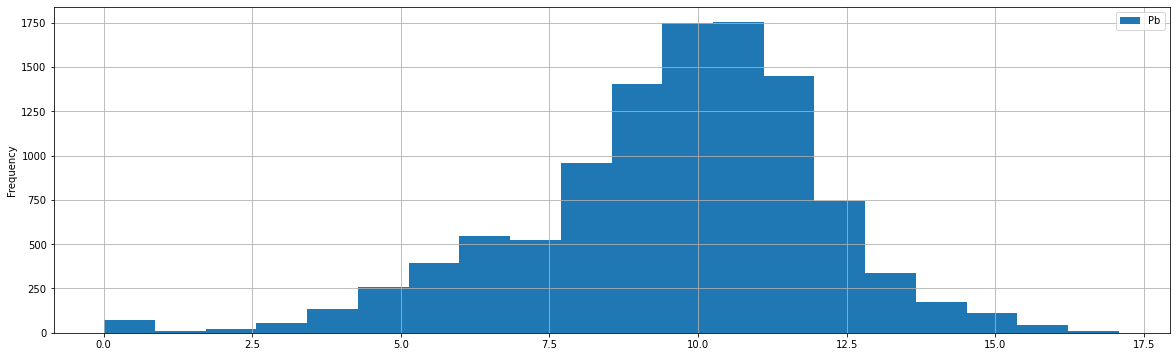

In [21]:
primary_Pb_men,primary_Pb_med=tex_proc_info (df_train,'primary_cleaner.output.concentrate_pb','Pb','После первой ступени очистки')

#### Pb вторая ступень очистки

После второй ступени очистки
Среднее содержание Pb в материале =  10.19
Медианное содержание Pb в материале =  10.34


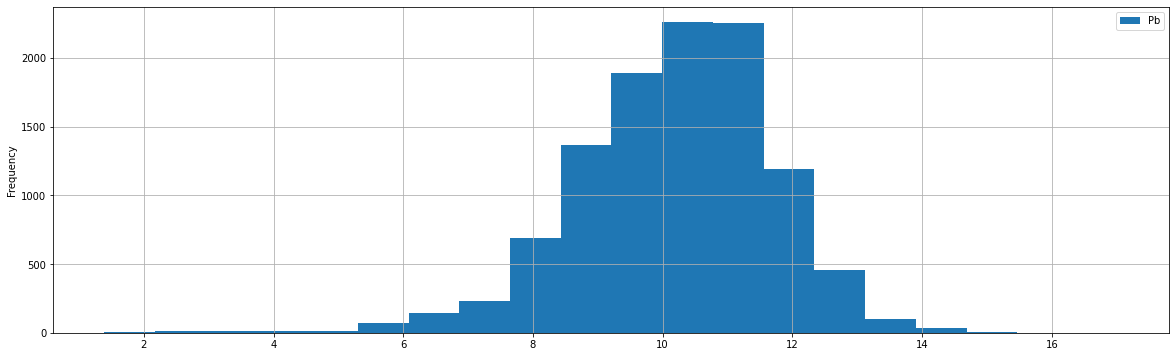

In [22]:
final_Pb_men,final_Pb_med=tex_proc_info (df_train,'final.output.concentrate_pb','Pb','После второй ступени очистки')

**Вывод**
В ходе технологического процесса обогащения руды концентрация золота растет, что является правильной тенденцией. Концентрация серебра уменьшается, а свинца увеличивается, что предположим является правильной тенденцией т.к. подробностей процесса нет. В полученных результатах видны аномалии, например нулевые значения, что скорее всего является не ошибкой, а данные датчиком получены с пустой породы.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

#### Флотация

Тренировачная выборка
Перед флотацией
Среднее содержание Size в материале =  57.33
Медианное содержание Size в материале =  53.97
Тестовая выборка
Перед флотацией
Среднее содержание Size в материале =  55.94
Медианное содержание Size в материале =  50.83
Относительная разница среднего размера гранул между выборками train и test =2.431 %
Относительная разница медианного размера гранул между выборками train и test =5.814 %


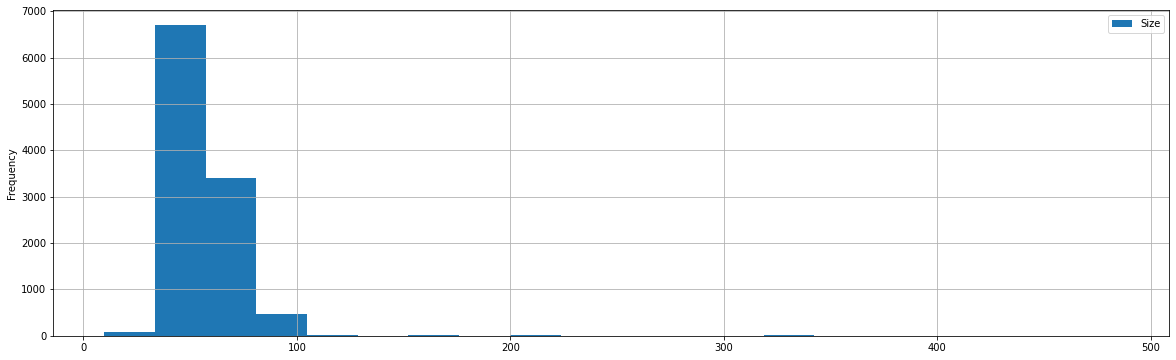

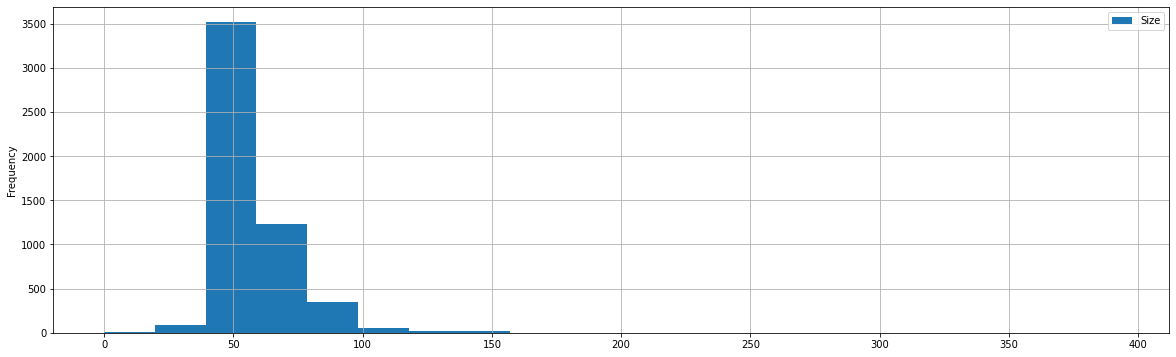

In [23]:
print('Тренировачная выборка')
rougher_size_men,rougher_size_med=tex_proc_info (df_train,'rougher.input.feed_size','Size','Перед флотацией')
print('Тестовая выборка')
rougher_size_test_men,rougher_size_test_med=tex_proc_info (df_test,'rougher.input.feed_size','Size','Перед флотацией')
print(f'Относительная разница среднего размера гранул между выборками train и test ={((abs(rougher_size_men-rougher_size_test_men))/rougher_size_men)*100:.4} %')
print(f'Относительная разница медианного размера гранул между выборками train и test ={((abs(rougher_size_med-rougher_size_test_med))/rougher_size_med)*100:.4} %')

**Вывод** 
Распределение размера гранул в тренировочной и тестовой выборках достаточно близкое, разница не превышает 10%, что можно считать хорошим показателем для сравнения выборок.

### Суммарная концентрацию всех веществ на разных стадиях

#### Флотация

После флотации
Среднее содержание All_Me в материале =  69.19
Медианное содержание All_Me в материале =  69.85


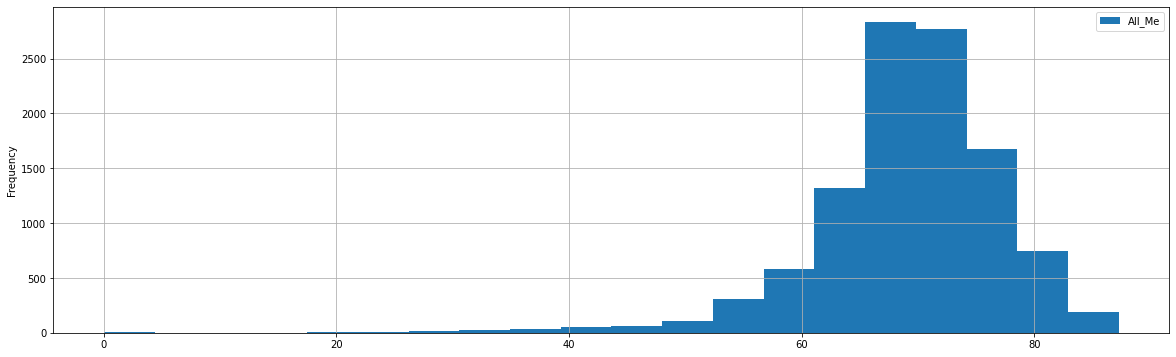

In [24]:
data_all_flot=df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_au']+df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol']

data_all_flot=pd.DataFrame(data_all_flot) 
data_all_flot.columns = ['Me']
rougher_Me_men,rougher_Me_med=tex_proc_info (data_all_flot,'Me','All_Me','После флотации')

#### Первая ступень очистки

После первой ступени очистки
Среднее содержание All_Me в материале =  60.99
Медианное содержание All_Me в материале =  61.98


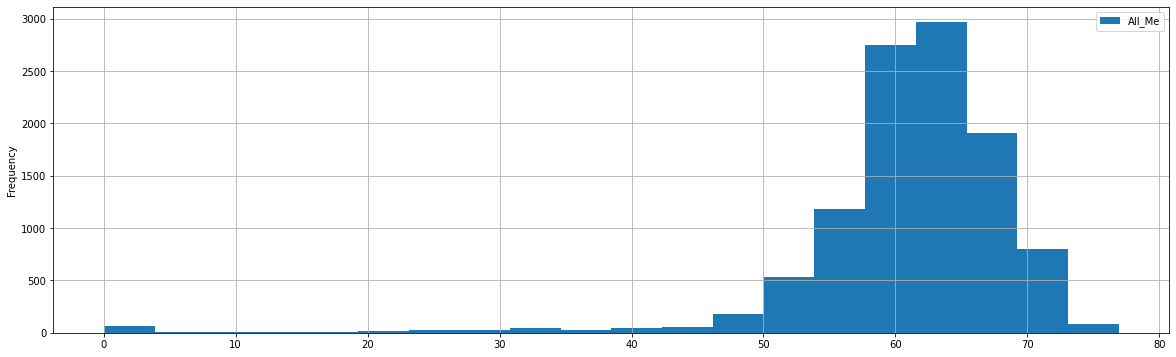

In [25]:
data_all_prim=df_train['primary_cleaner.output.concentrate_ag']+df_train['primary_cleaner.output.concentrate_au']+df_train['primary_cleaner.output.concentrate_pb']+df_train['primary_cleaner.output.concentrate_sol']

data_all_prim=pd.DataFrame(data_all_prim) 
data_all_prim.columns = ['Me']
prim_Me_men,prim_Me_med=tex_proc_info (data_all_prim,'Me','All_Me','После первой ступени очистки')

#### Вторая ступень очистки

После второй ступени очистки
Среднее содержание All_Me в материале =  69.26
Медианное содержание All_Me в материале =  69.47


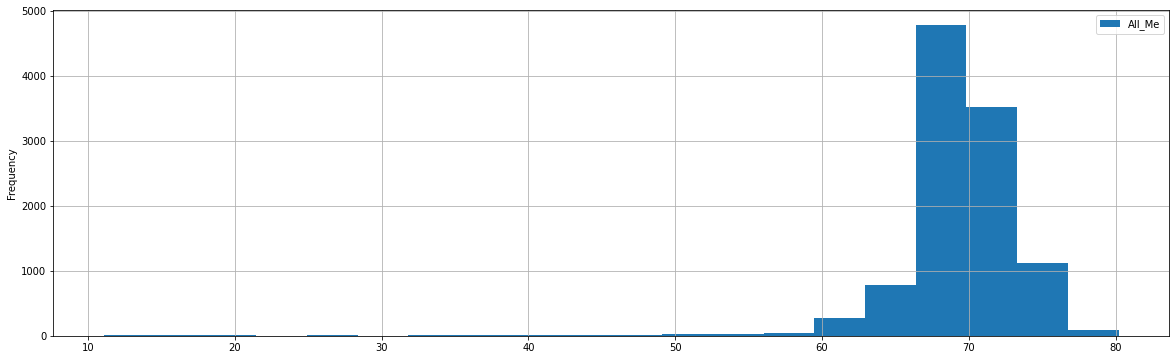

In [26]:
data_all_final=df_train['final.output.concentrate_ag']+df_train['final.output.concentrate_au']+df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol']

data_all_final=pd.DataFrame(data_all_final) 
data_all_final.columns = ['Me'] 
final_Me_men,final_Me_med=tex_proc_info (data_all_final,'Me','All_Me','После второй ступени очистки')

**Вывод**
Сумарное количество веществ в руде после каждой стадии очистки изменяется не значительно в районе 15%.

### Обучение и сравнение нескольких моделей

#### Cимметричное среднее абсолютное процентное отклонение (sMAPE)

In [27]:
def sMAPE (data_target,predict_target):
    smape=abs(data_target-predict_target)/((abs(data_target)+abs(predict_target))/2)
    smape=(smape.sum()/len(smape))*100
    return smape

#### Флотация

In [28]:
list_columns_rougher=[] 
for i in columns_train_test:
    if 'roug' in i:
        list_columns_rougher.append(i)

In [29]:
features =df_train[list_columns_rougher] 
target =df_train['rougher.output.recovery'] 
#разделяем на выборку для обучения и тестирования, 25% данных для валидации (теста)
features_train_rougher, features_valid_rougher, target_train_rougher, target_valid_rougher = train_test_split(features, target, test_size=0.25, random_state=2504)

#####  Модель линейной регрессии

In [31]:
model_1 = LinearRegression() 
model_1.fit(features_train_rougher, target_train_rougher)  
predictions_1 = model_1.predict(features_valid_rougher) 
result_1 =math.sqrt(mean_squared_error(target_valid_rougher, predictions_1,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_1:.4}') 
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_rougher, predictions_1):.4} %')

Cреднеквадратичная ошибка RMSE = 5.352
Cимметричное среднее абсолютное процентное отклонение sMAPE = 4.639 %


#####  Модель дерева решений

In [32]:
%%time
model_DTR = DecisionTreeRegressor()
parametrs={
    'max_depth':range(1,11,2),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(2,12,2)
}
grid_param=GridSearchCV(model_DTR,parametrs,cv=5)
grid_param.fit(features_train_rougher, target_train_rougher)


CPU times: user 1min 10s, sys: 206 ms, total: 1min 10s
Wall time: 1min 10s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11, 2),
                         'min_samples_leaf': range(2, 12, 2),
                         'min_samples_split': range(1, 10)})

In [33]:
grid_param.best_params_

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 9}

In [34]:

model_DTR_2 = DecisionTreeRegressor(random_state=2504, max_depth=grid_param.best_params_['max_depth']).fit(features_train_rougher, target_train_rougher) 
predictions_2 = model_DTR_2.predict(features_valid_rougher) 
result_2 =math.sqrt(mean_squared_error(target_valid_rougher, predictions_2,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_2:.4}')  
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_rougher, predictions_2):.4} %')

Cреднеквадратичная ошибка RMSE = 5.306
Cимметричное среднее абсолютное процентное отклонение sMAPE = 3.741 %


#####  Модель случайный лес

In [35]:
%%time
model_RFR_1 = RandomForestRegressor ()
parametrs={
    'n_estimators':range(110,151,10),
    'max_depth':range(8,12,1),
}
grid_param=GridSearchCV(model_RFR_1,parametrs,cv=3)
grid_param.fit(features_train_rougher, target_train_rougher)


CPU times: user 7min 44s, sys: 808 ms, total: 7min 45s
Wall time: 7min 45s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(8, 12),
                         'n_estimators': range(110, 151, 10)})

In [36]:
grid_param.best_params_

{'max_depth': 11, 'n_estimators': 140}

In [37]:
model_RFR_3 = RandomForestRegressor(random_state=2504, max_depth=grid_param.best_params_['max_depth'],n_estimators=grid_param.best_params_['n_estimators']).fit(features_train_rougher, target_train_rougher) 
predictions_3 = model_RFR_3.predict(features_valid_rougher) 
result_3 =math.sqrt(mean_squared_error(target_valid_rougher, predictions_3,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_3:.4}')  
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_rougher, predictions_3):.4} %')

Cреднеквадратичная ошибка RMSE = 3.943
Cимметричное среднее абсолютное процентное отклонение sMAPE = 2.838 %


In [38]:
random_state = 2504
cv = 5
models_1 = [model_1,
          model_DTR_2, 
          model_RFR_3, 
          ]
results_cross_val = []

for model in models_1: 

    cross_val_score_rougher = cross_val_score(model, 
                                              features_train_rougher, 
                                              target_train_rougher, 
                                              cv=cv).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher
0,LinearRegression,0.493881
1,DecisionTreeRegressor,0.625917
2,RandomForestRegressor,0.766795


#### Первичная и вторичная очистка

In [39]:
list_columns_final=[]
for i in columns_train_test:
    if 'primary' in i or 'final' in i:
        list_columns_final.append(i)

In [40]:
features =df_train[list_columns_final]
features['rougher.output.recovery']=df_train['rougher.output.recovery']
target =df_train['final.output.recovery'] 
#разделяем на выборку для обучения и тестирования, 25% данных для валидации (теста)
features_train_final, features_valid_final, target_train_final, target_valid_final = train_test_split(features, target, test_size=0.25, random_state=2504)

#####  Модель линейной регрессии

In [41]:
model_1_1 = LinearRegression() 
model_1_1.fit(features_train_final,  target_train_final)  
predictions_1_1 = model_1_1.predict(features_valid_final) 
result_1 =math.sqrt(mean_squared_error(target_valid_final, predictions_1_1,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_1:.4}') 
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_final, predictions_1_1):.4} %')

Cреднеквадратичная ошибка RMSE = 6.043
Cимметричное среднее абсолютное процентное отклонение sMAPE = 6.377 %


#####  Модель дерева решений

In [42]:
%%time
model_DTR = DecisionTreeRegressor()
parametrs={
    'max_depth':range(1,11,2),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(2,12,2)
}
grid_param=GridSearchCV(model_DTR,parametrs,cv=5)
grid_param.fit(features_train_final,  target_train_final)


CPU times: user 43.3 s, sys: 60 ms, total: 43.4 s
Wall time: 43.4 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11, 2),
                         'min_samples_leaf': range(2, 12, 2),
                         'min_samples_split': range(1, 10)})

In [43]:
grid_param.best_params_

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [44]:

model_DTR_2_2 = DecisionTreeRegressor(random_state=2504, max_depth=grid_param.best_params_['max_depth']).fit(features_train_final,  target_train_final) 
predictions_2_2 = model_DTR_2_2.predict(features_valid_final) 
result_2 =math.sqrt(mean_squared_error(target_valid_final, predictions_2_2,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_2:.4}') # среднеквадратичная ошибка 
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_final, predictions_2_2):.4} %')

Cреднеквадратичная ошибка RMSE = 6.105
Cимметричное среднее абсолютное процентное отклонение sMAPE = 6.169 %


#####  Модель случайный лес

In [45]:
%%time
model_RFR = RandomForestRegressor ()
parametrs={
    'n_estimators':range(90,121,10),
    'max_depth':range(20,25,1),
}
grid_param=GridSearchCV(model_RFR,parametrs,cv=3)
grid_param.fit(features_train_final,  target_train_final)


CPU times: user 6min 7s, sys: 1.08 s, total: 6min 8s
Wall time: 6min 8s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(20, 25),
                         'n_estimators': range(90, 121, 10)})

In [46]:
grid_param.best_params_

{'max_depth': 23, 'n_estimators': 90}

In [47]:
model_RFR_3_3 = RandomForestRegressor(random_state=2504, max_depth=grid_param.best_params_['max_depth'],n_estimators=grid_param.best_params_['n_estimators']).fit(features_train_final,  target_train_final) 
predictions_3_3 = model_RFR_3_3.predict(features_valid_final)
result_3 =math.sqrt(mean_squared_error(target_valid_final, predictions_3_3,squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE = {result_3:.4}') 
print(f'Cимметричное среднее абсолютное процентное отклонение sMAPE = {sMAPE(target_valid_final, predictions_3_3):.4} %')

Cреднеквадратичная ошибка RMSE = 4.84
Cимметричное среднее абсолютное процентное отклонение sMAPE = 4.854 %


In [48]:
random_state = 2504
cv = 5
models_1 = [model_1_1,
          model_DTR_2_2, 
          model_RFR_3_3, 
          ]
results_cross_val = []

for model in models_1: 
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train_final, 
                                              target_train_final, 
                                              cv=cv).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher
0,LinearRegression,0.423572
1,DecisionTreeRegressor,0.407007
2,RandomForestRegressor,0.607334


**Вывод** 
Проанализировав полученные результаты 3-х моделей, выбор останавливаем на модели случайного леса. Выбранная модель демонстрирует значение параметра RMSE меньше, чем у  большенства моделей, а так же параметр sMAPE минимальный. В ходе кросс валидации модель случайного леса так же показала наилучший результат.

### Проверка модели на тестовой выборке

#### Флотация

In [49]:
list_date=df_test['date'] 
target_test=df_full[df_full['date'].isin(list_date)] 
target_rougher_test_valid=target_test['rougher.output.recovery'] 
features_rougher_test =df_test[list_columns_rougher]   

In [50]:
df_test['rougher.output.recovery']=model_RFR_3.predict(features_rougher_test)  

#### Финальный этап

In [51]:
target_final_test_valid=target_test['final.output.recovery'] 
# Признака по списку 
features_final_test =df_test[list_columns_final]
features_final_test['rougher.output.recovery']=df_test['rougher.output.recovery'] 

In [52]:
df_test['final.output.recovery']=model_RFR_3_3.predict(features_final_test)

In [56]:
#флотация
dummy_regressor_rougher = DummyRegressor(strategy="median") 
dummy_regressor_rougher.fit(features_train_rougher, target_train_rougher) 
dummy_rougher_pred = dummy_regressor_rougher.predict(features_rougher_test) 
sMAPE_dummy_rougher = sMAPE(target_rougher_test_valid, dummy_rougher_pred)
print(sMAPE_dummy_rougher) 
# финальный этап
dummy_regressor_rougher = DummyRegressor(strategy="median") 
dummy_regressor_rougher.fit(features_train_final,  target_train_final) 
dummy_rougher_pred = dummy_regressor_rougher.predict(features_final_test) 
sMAPE_dummy_final = sMAPE(target_final_test_valid, dummy_rougher_pred)
print(sMAPE_dummy_final) 

print(f'Итоговые результаты sMAPE = {(sMAPE_dummy_rougher*0.25+sMAPE_dummy_final*0.75):.4} %')

8.771567036897794
9.760336705613867
Итоговые результаты sMAPE = 9.513 %


In [57]:
#флотация
sMAPE_1=sMAPE(target_rougher_test_valid,df_test['rougher.output.recovery'])
result=math.sqrt(mean_squared_error(target_rougher_test_valid,df_test['rougher.output.recovery'],squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE после флотации= {result:.4}') # среднеквадратичная ошибка 
# финальный этап
sMAPE_2=sMAPE(target_final_test_valid,df_test['final.output.recovery'])
result=math.sqrt(mean_squared_error(target_final_test_valid,df_test['final.output.recovery'],squared=True)) 
print(f'Cреднеквадратичная ошибка RMSE финал= {result:.4}') # среднеквадратичная ошибка 

print(f'Итоговые результаты sMAPE = {(sMAPE_1*0.25+sMAPE_2*0.75):.4} %')

Cреднеквадратичная ошибка RMSE после флотации= 12.58
Cреднеквадратичная ошибка RMSE финал= 9.417
Итоговые результаты sMAPE = 1.038 %


In [58]:
12.58*0.25 + 9.416*0.75

10.207

## Вывод

В игоге результат был достигнут  с метрикой симметричное среднее абсолютное процентное отклонение в 1%.Полученное значение меньше чем у константной модели, которая имеет отклонение в 9.5%. Таким образом можно судить о адекватности полученных результатов. 